
# Importing the libraries



In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datos.csv')
dataset.head()

,review,sentiment
0,I love sci-fi and am willing to put up with a ...,0
1,"Worth the entertainment value of a rental, esp...",0
2,its a totally average film with a few semi-alr...,0
3,STAR RATING: ***** Saturday Night **** Friday ...,0
4,"First off let me say, If you haven't enjoyed a...",0


# Cleaning the data

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
corpus = []
ps = PorterStemmer()
for i in range(0, 50000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['review'][i])
  review = review.lower()
  review = review.split()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)
dataset['review'] = corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Aplicar BoW (Para la RQ1 no se va aplicar TFIDF)

In [ ]:
vectorizer = CountVectorizer(analyzer = 'word', tokenizer = None, preprocessor = None, stop_words = None, max_features = 5000)
X = dataset["review"]
Y = dataset['sentiment']

X = vectorizer.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

# Asignar los diferentes parámetros

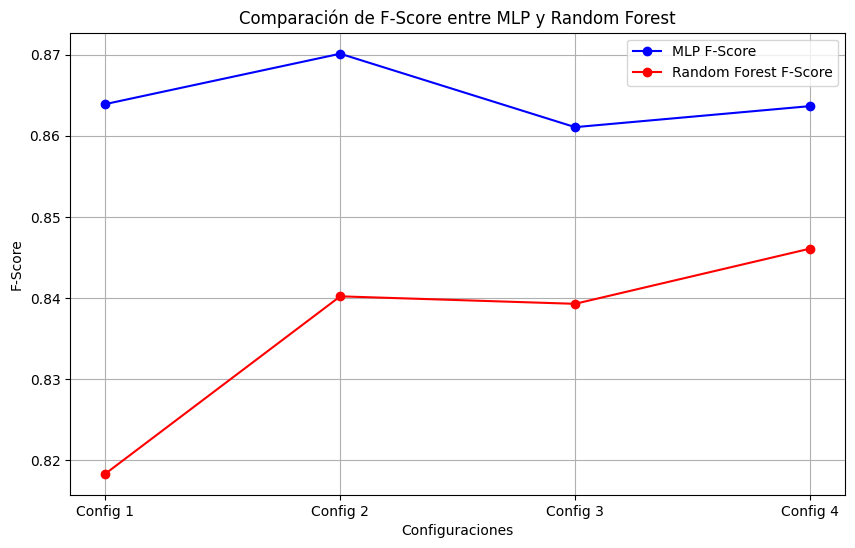

In [ ]:
# Configuraciones de parámetros para MLP y RandomForest
mlp_params = [
    {'hidden_layer_sizes': (10,), 'activation': 'relu', 'alpha': 0.0001},
    {'hidden_layer_sizes': (20,), 'activation': 'relu', 'alpha': 0.1},
    {'hidden_layer_sizes': (10, 10), 'activation': 'logistic', 'alpha': 0.0001},
    {'hidden_layer_sizes': (20, 20), 'activation': 'logistic', 'alpha': 0.0001}

]

rf_params = [
    {'n_estimators': 50, 'max_depth': 5},
    {'n_estimators': 100, 'max_depth': 10},
    {'n_estimators': 50, 'max_depth': 15},
    {'n_estimators': 100, 'max_depth': 15}
]

# Listas para almacenar los resultados de F-Score
mlp_scores = []
rf_scores = []

# Entrenar los modelos con diferentes configuraciones y almacenar F-Score
for mlp_param, rf_param in zip(mlp_params, rf_params):
    # MLP
    mlp = MLPClassifier(**mlp_param, random_state=42)
    mlp.fit(X_train, Y_train)
    mlp_pred = mlp.predict(X_test)
    mlp_fscore = f1_score(Y_test, mlp_pred)
    mlp_scores.append(mlp_fscore)

    # Random Forest
    rf = RandomForestClassifier(**rf_param, random_state=42)
    rf.fit(X_train, Y_train)
    rf_pred = rf.predict(X_test)
    rf_fscore = f1_score(Y_test, rf_pred)
    rf_scores.append(rf_fscore)
plt.figure(figsize=(10, 6))

plt.plot(range(1, 5), mlp_scores, marker='o', linestyle='-', color='b', label='MLP F-Score')
plt.plot(range(1, 5), rf_scores, marker='o', linestyle='-', color='r', label='Random Forest F-Score')

plt.title('Comparación de F-Score entre MLP y Random Forest')
plt.xlabel('Configuraciones')
plt.ylabel('F-Score')
plt.xticks(range(1, 5), ['Config 1', 'Config 2', 'Config 3', 'Config 4'])
plt.legend()
plt.grid(True)
plt.show()